<a href="https://colab.research.google.com/github/Amarsinh0/MY-NOTES/blob/main/Copy_of_Copy_of_my_notes_k_n_eda_prt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **in data analysis we will analyse to find out the below steps**

---
1) missing values

---


2) all the numrical variables

---


3) distribution of the numrical variables

---





4)categorical variables

---


5)cardinality of catagorical variable

---


6)outliers

---


7) relation between dependend and independend variables 


---

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/HousePricePrediction.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


# **MISSING VALUES**

## STEP A : **here we find % of null values present in features**


In [ ]:
# STEP 1) ..making the list of features having missing values 

features_with_na=[features for features in dataset.columns if dataset [features].isnull().sum()>1]
for feature in features_with_na:
  print(feature,np.round(dataset[feature].isnull().mean(),4),'% missing values ')

MSZoning 0.0014 % missing values 
SalePrice 0.4998 % missing values 


**STEP B :  since the we have some missing values so we need to find out the relation of missing  values with sales price**

---
### #plot some diagram of relationship


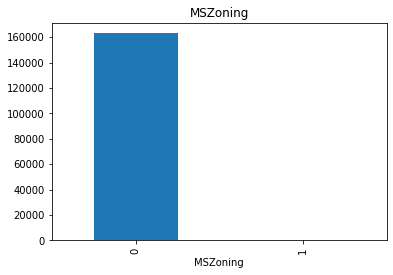

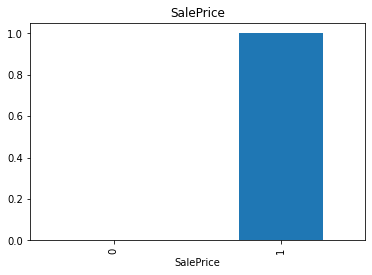

In [ ]:
for feature in features_with_na:
  data=dataset.copy()

  data[feature]=np.where(data[feature].isnull(),1,0)    #  1 for missing observation and 0 for others
  data.groupby(feature)['SalePrice'].median().plot.bar() #median sealsprize

  plt.title(feature)
  plt.show()

In [ ]:
print('Id of House: {}'. format(len(dataset.Id)))

Id of House: 2919


# **numerical varables**

In [ ]:
# list of numrical variables 
numerical__features=[feature for feature in dataset.columns if dataset[feature].dtype !='o']
print('number of numrical varialbles: ', len(numerical__features))

# visualise the numrical  variables 
dataset[numerical__features].head()


number of numrical varialbles:  13


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


# **TEMPORAL VARIABLES (Eg. Datetime Variables )**

***we have extract information from the datetime variables like no of  years or no of days . ***


In [ ]:
# list of variables that contains year information
year_feature = [feature for feature in numerical__features if 'Yr'in feature or 'Year' in feature]
print(year_feature)

['YearBuilt', 'YearRemodAdd']


In [ ]:
# lets find out how many year variables
for feature in year_feature:
   print(feature,dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905
 1907 1896 1902 1895 1879 1901]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


### lets analyse temporal datetime variables 

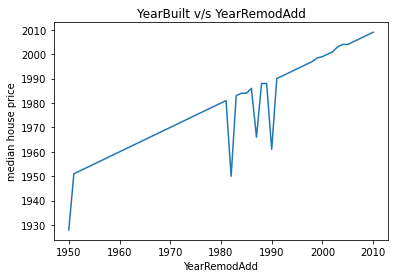

In [ ]:
dataset.groupby('YearRemodAdd')['YearBuilt'].median().plot()
plt.xlabel('YearRemodAdd')
plt.ylabel('median house price')
plt.title('YearBuilt v/s YearRemodAdd')
plt.show()

### **here we will compare the diffrence between all years feature with salesprice**

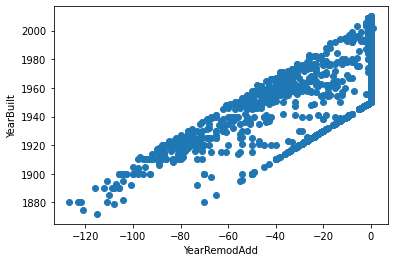

In [ ]:
for feature in year_feature:
  if feature !='YearBuilt':
    data=dataset.copy()

    data[feature]=data['YearBuilt']-data[feature]
    plt.scatter(data[feature],data['YearBuilt'])
    plt.ylabel('YearBuilt')
    plt.xlabel(feature)
    plt.show()


numerical variables besically have two types

*   discrete variables

*   numrical variables



**DISCREATE FEATURE**

In [ ]:
# finding count of discrete features in dataset
discrete_feature =[feature for feature in numerical__features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print('discreat varuables Count :{}'.format(len(discrete_feature)))


discreat varuables Count :6


In [ ]:
discrete_feature

['MSSubClass',
 'MSZoning',
 'LotConfig',
 'BldgType',
 'OverallCond',
 'Exterior1st']

In [ ]:
dataset[discrete_feature].head()


,MSSubClass,MSZoning,LotConfig,BldgType,OverallCond,Exterior1st
0,60,RL,Inside,1Fam,5,VinylSd
1,20,RL,FR2,1Fam,8,MetalSd
2,60,RL,Inside,1Fam,5,VinylSd
3,70,RL,Corner,1Fam,5,Wd Sdng
4,60,RL,FR2,1Fam,5,VinylSd


In [ ]:
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


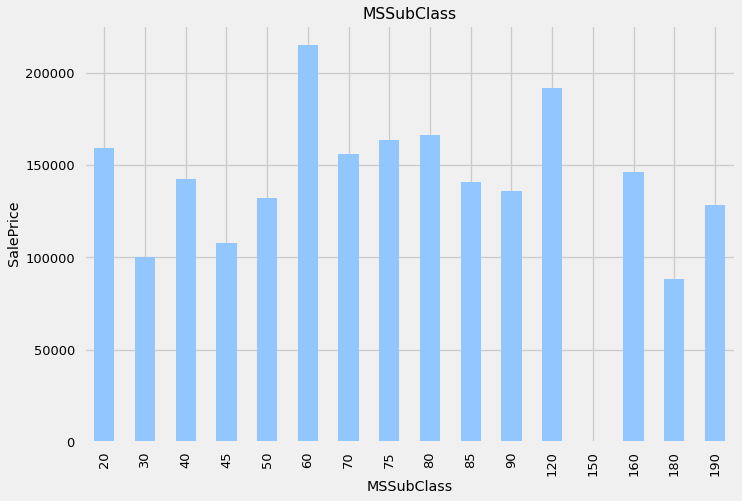

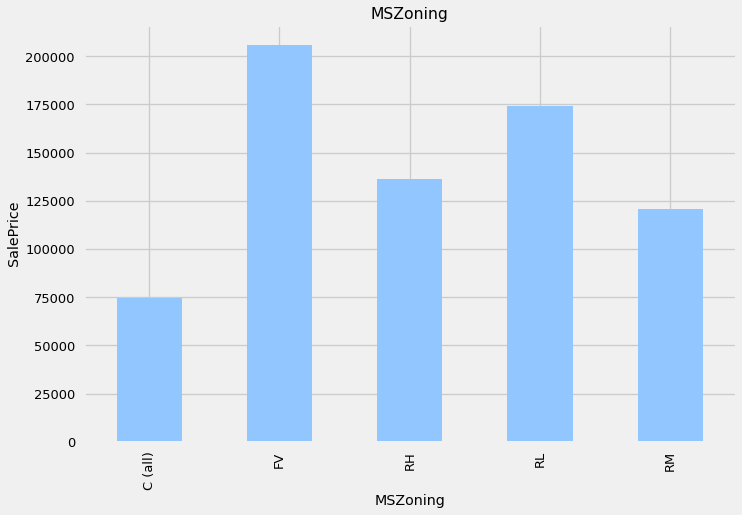

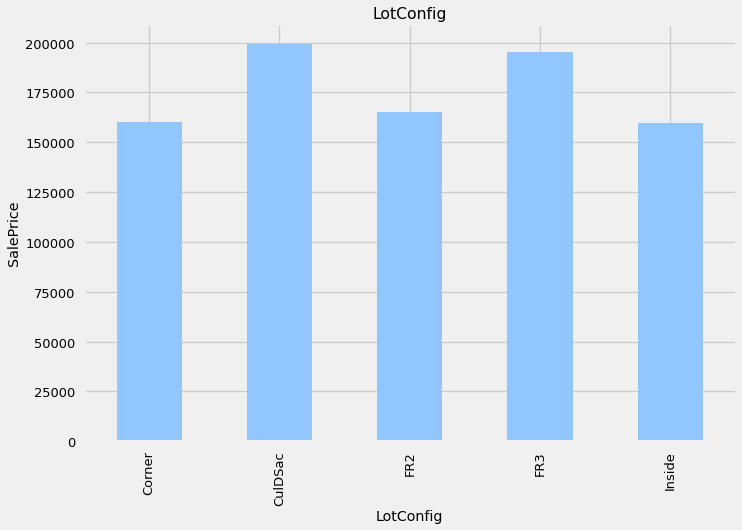

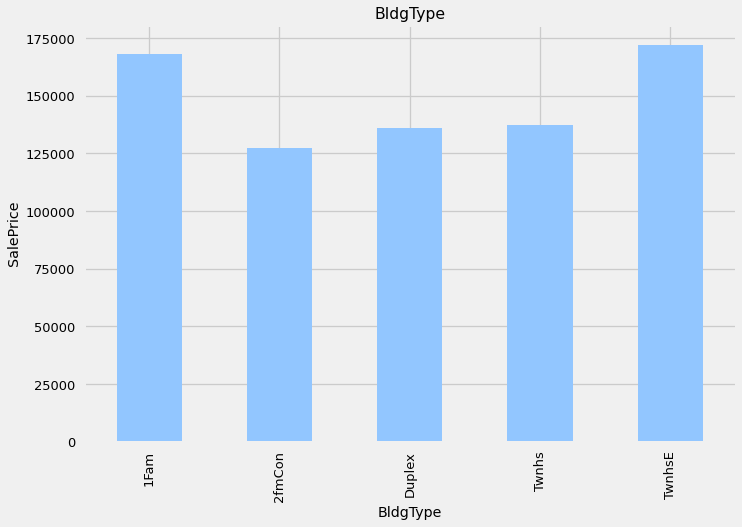

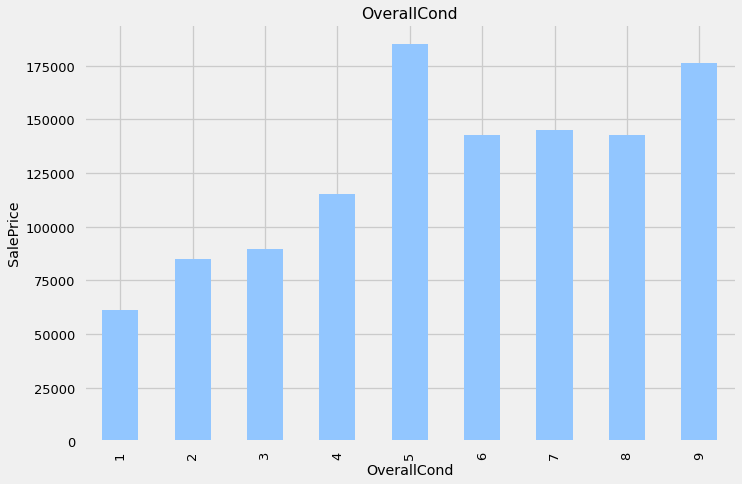

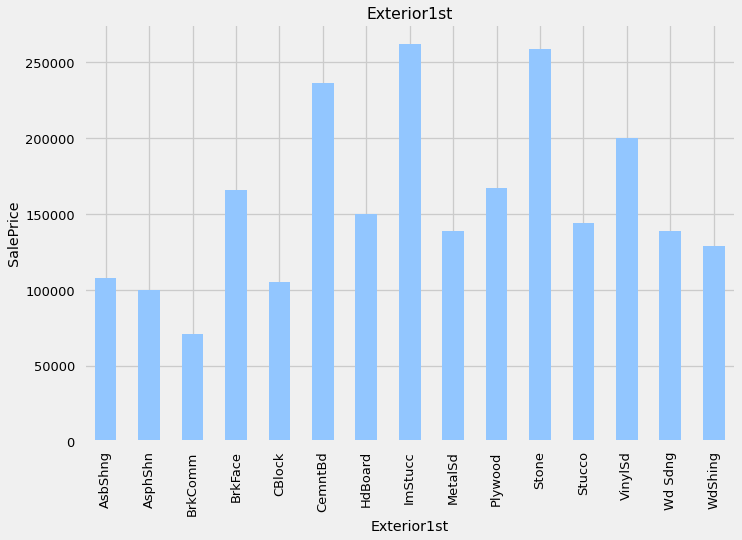

In [ ]:
for feature in discrete_feature:
  data=dataset.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.style.use('seaborn-v0_8-pastel')
  plt.title(feature)
  plt.show()

# CONTINIOUS FEATURE ANALYSIS 

In [ ]:
continious_feature =[ feature for feature in numerical__features if feature not in discrete_feature+year_feature+['Id']]
print('continious feature count : {} '.format(len(continious_feature)))

continious feature count : 4 


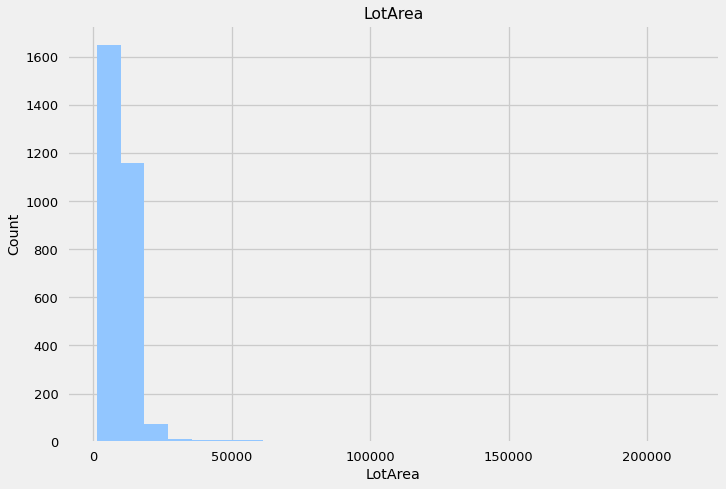

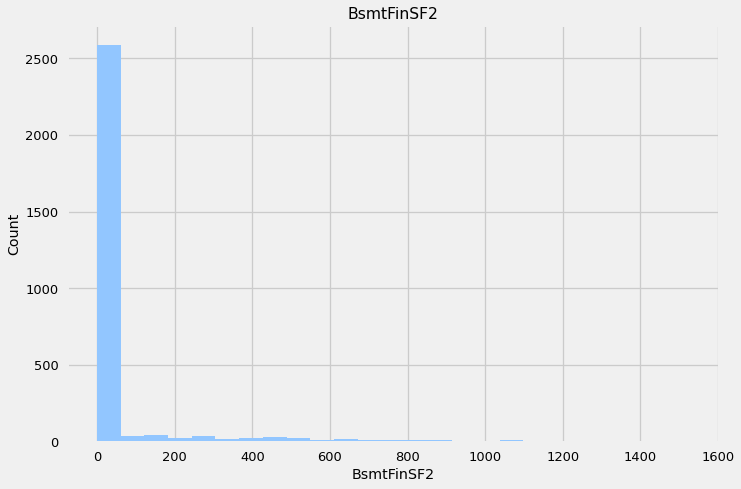

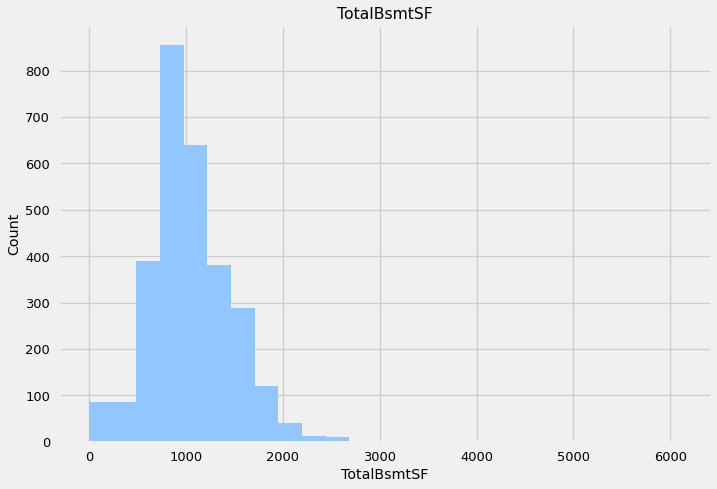

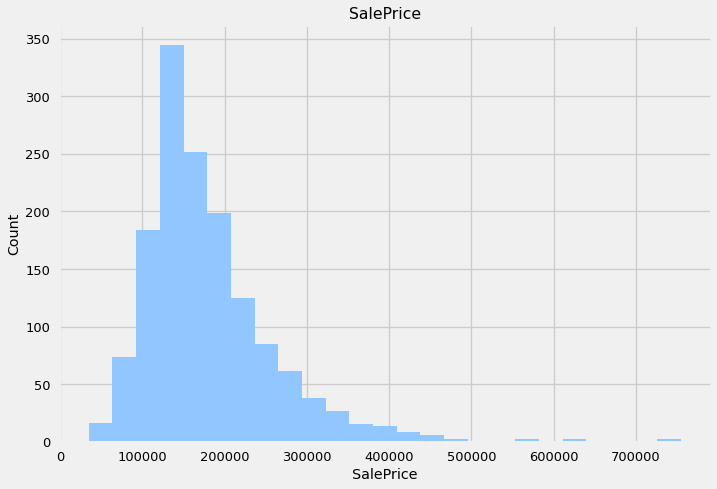

In [ ]:
for feature in continious_feature :
  data=dataset.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()

In [ ]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')